In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Tornadoes_SPC_1950to2015.csv')
tonadoes_1996 = df[df['yr'] >= 1996][['st','loss','closs']]

In [16]:
tonadoes_1996.head(10)

,st,loss,closs
35431,FL,0.04,0.0
35432,SC,0.03,0.0
35433,SC,0.00,0.0
35434,FL,1.20,0.0
35435,FL,0.10,0.0
35436,AL,0.10,0.0
35437,TX,0.15,0.0
35438,TX,0.75,0.0
35439,TX,0.75,0.0
35440,TX,0.00,0.0


In [29]:
tonadoes_1996_damage = pd.DataFrame({'count': tonadoes_1996.groupby(['st'])['loss'].count(), 'total_loss': tonadoes_1996.groupby(['st'])['loss'].sum(), 'total_crop_loss': tonadoes_1996.groupby(['st'])['closs'].sum()})

In [30]:
tonadoes_1996_damage

,count,total_crop_loss,total_loss
st,,,
AK,3,0.00,0.00
AL,1059,3.01,5345.27
AR,850,0.35,1304.70
AZ,82,0.00,2.45
CA,202,1.15,35.26
CO,912,0.12,178.13
CT,32,0.00,9.32
DE,8,0.00,1.45
FL,1129,0.10,923.86


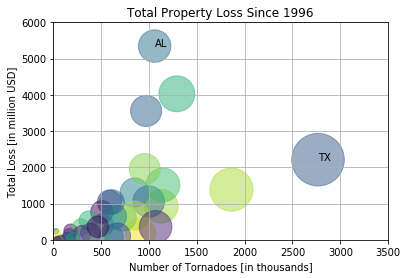

In [12]:
#Separate the dataframe into series
count = tonadoes_1996_damage['count'] 
loss = tonadoes_1996_damage['total_loss']

#Find the state with maximum number of tornadoes and then get the index label and plot points
max_tornado_count = tonadoes_1996_damage['count'].max()
max_tornado_cnt_label = tonadoes_1996_damage[tonadoes_1996_damage['count'] == max_tornado_count].index.tolist()[0]
max_tornado_cnt_x = tonadoes_1996_damage[tonadoes_1996_damage['count'] == max_tornado_count]['count']
max_tornado_cnt_y = tonadoes_1996_damage[tonadoes_1996_damage['count'] == max_tornado_count]['total_loss']

#Find the state with maximum amount of property damage and then get the index label and plot points
max_tornado_loss = tonadoes_1996_damage['total_loss'].max()
max_tornado_loss_label = tonadoes_1996_damage[tonadoes_1996_damage['total_loss'] == max_tornado_loss].index.tolist()[0]
max_tornado_loss_x = tonadoes_1996_damage[tonadoes_1996_damage['total_loss'] == max_tornado_loss]['count']
max_tornado_loss_y = tonadoes_1996_damage[tonadoes_1996_damage['total_loss'] == max_tornado_loss]['total_loss']

#Find the state with maximum amount of property damage and then get the index label and plot points
max_tornado_closs = tonadoes_1996_damage['total_crop_loss'].max()
max_tornado_closs_label = tonadoes_1996_damage[tonadoes_1996_damage['total_crop_loss'] == max_tornado_loss].index.tolist()[0]
max_tornado_closs_x = tonadoes_1996_damage[tonadoes_1996_damage['total_crop_loss'] == max_tornado_loss]['count']
max_tornado_closs_y = tonadoes_1996_damage[tonadoes_1996_damage['total_crop_loss'] == max_tornado_loss]['total_crop_loss']

#Prepare our plot
colors = np.random.rand(51)
area = count
plt.scatter(count, loss,s=area,c=colors,alpha=.5)

#Provide axis labels and a title
xlab = "Number of Tornadoes [in thousands]"
ylab = "Total Loss [in million USD]"
title = "Total Property Loss Since 1996"

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

#set the axis limits
plt.xlim(0, 3500)
plt.ylim(0, 6000)

#Apply grid lines for good measure
plt.grid(True)

#Plot the max values for count and loss
plt.text(max_tornado_cnt_x, max_tornado_cnt_y, max_tornado_cnt_label)
plt.text(max_tornado_loss_x, max_tornado_loss_y, max_tornado_loss_label)

plt.show()